In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2 = pd.read_csv('../data/datos_limpios.csv')

In [5]:
df = pd.read_csv('../data/allinone.csv')

In [3]:
# Agarramos un sample de la base para solo trabajar con ~100K registros en vez de la totalidad de los datos

df_sample = df2.sample(n=100_000, random_state=42)

In [4]:
df_sample.to_csv('../data/sample_limpios.csv')

### Exploracion inicial

In [39]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 247595 to 1714709
Data columns (total 75 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    100000 non-null  int64  
 1    Destination Port             100000 non-null  float64
 2    Flow Duration                100000 non-null  float64
 3    Total Fwd Packets            100000 non-null  float64
 4    Total Backward Packets       100000 non-null  float64
 5   Total Length of Fwd Packets   100000 non-null  float64
 6    Total Length of Bwd Packets  100000 non-null  float64
 7    Fwd Packet Length Max        100000 non-null  float64
 8    Fwd Packet Length Min        100000 non-null  float64
 9    Fwd Packet Length Mean       100000 non-null  float64
 10   Fwd Packet Length Std        100000 non-null  float64
 11  Bwd Packet Length Max         100000 non-null  float64
 12   Bwd Packet Length Min        100000 non-nu

In [40]:
df_sample.describe(include='all')

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Total_Packets,Fwd_Bwd_Packet_Ratio,Duration_per_Packet,Bytes_per_Second,Total_Active_Flags
count,1.000000e+05,100000.00000,1.000000e+05,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,...,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,benign,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,81206,NaN,NaN,NaN,NaN,NaN
mean,1.532233e+06,8723.72892,1.728476e+07,11.015840,12.141200,6.091398e+02,2.191893e+04,239.720280,19.241370,65.820098,...,1.002092e+07,6.051732e+05,1.047808e+07,9.550031e+06,NaN,23.157040,1.166414,1.843479e+07,1.372721e+03,0.795950
std,9.681142e+05,19126.23771,3.580839e+07,830.452641,1035.670594,6.328125e+03,2.764627e+06,783.179404,62.897822,203.539532,...,2.581225e+07,5.075995e+06,2.660107e+07,2.554800e+07,NaN,1865.333975,4.110322,4.002553e+07,4.123152e+04,0.693252
min,1.100000e+01,0.00000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2.000000,0.076923,-2.000000e+00,0.000000e+00,0.000000
25%,6.514368e+05,53.00000,2.180000e+02,2.000000,1.000000,2.000000e+01,6.000000e+00,6.000000,0.000000,6.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2.000000,0.500000,3.075000e+02,1.199921e+01,0.000000
50%,1.790667e+06,80.00000,5.894350e+04,2.000000,2.000000,6.600000e+01,1.580000e+02,40.000000,2.000000,37.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,4.000000,0.666667,8.759000e+04,1.380567e+02,1.000000
75%,2.407180e+06,443.00000,5.528432e+06,6.000000,5.000000,3.410000e+02,1.496500e+03,223.000000,37.000000,52.714286,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,11.000000,1.200000,3.887384e+06,3.076235e+02,1.000000


### Asociar puertos con protocolos

    Destination Port: Los puertos destino comunes están asociados a protocolos específicos. Por ejemplo:

        Puerto 80/443: HTTP/HTTPS.

        Puerto 21/22: FTP/SSH.

        Puerto 53: DNS 410.


In [62]:
# Diccionario de puertos comunes y protocolos
protocol_map = {
    80: 'HTTP',
    443: 'HTTPS',
    21: 'FTP',
    22: 'SSH',
    53: 'DNS',
    444: 'SNPP',
    139: 'SMB',
    445: 'SMB',
    8080: 'TCP',
}
# Columna "Inferred Protocol" basada en la columna de los puertos destino
df_sample['Inferred Protocol'] = df_sample[' Destination Port'].map(protocol_map)

# Verificar resultados
print(df_sample['Inferred Protocol'].value_counts())

Inferred Protocol
DNS      34395
HTTP     23017
HTTPS    18425
SSH        403
FTP        394
SMB        179
TCP        109
SNPP         8
Name: count, dtype: int64


### VISUALIZACIÓN DE LOS DATOS CON SEABORN 


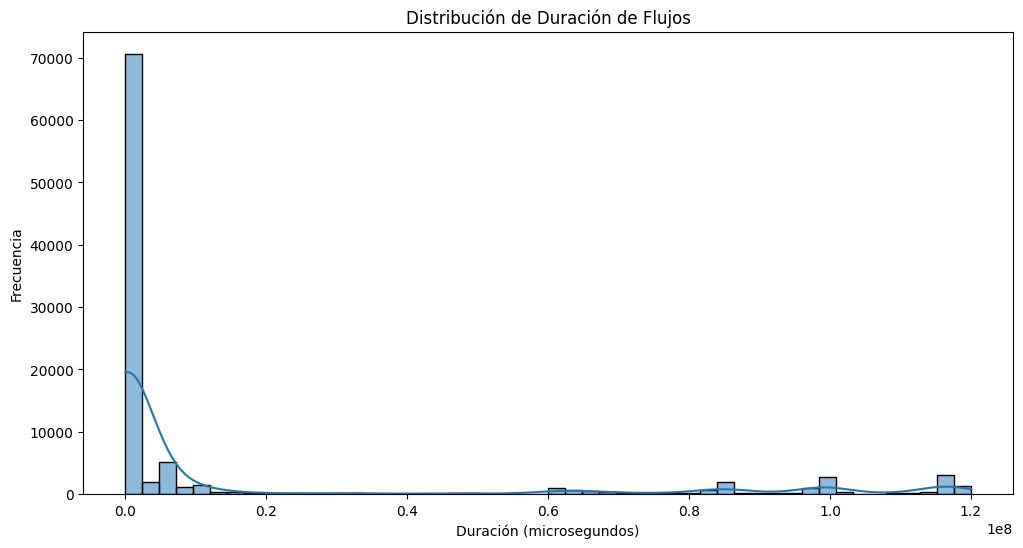

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(df_sample[' Flow Duration'], bins=50, kde=True)
plt.title('Distribución de Duración de Flujos')
plt.xlabel('Duración (microsegundos)')
plt.ylabel('Frecuencia')
plt.show()

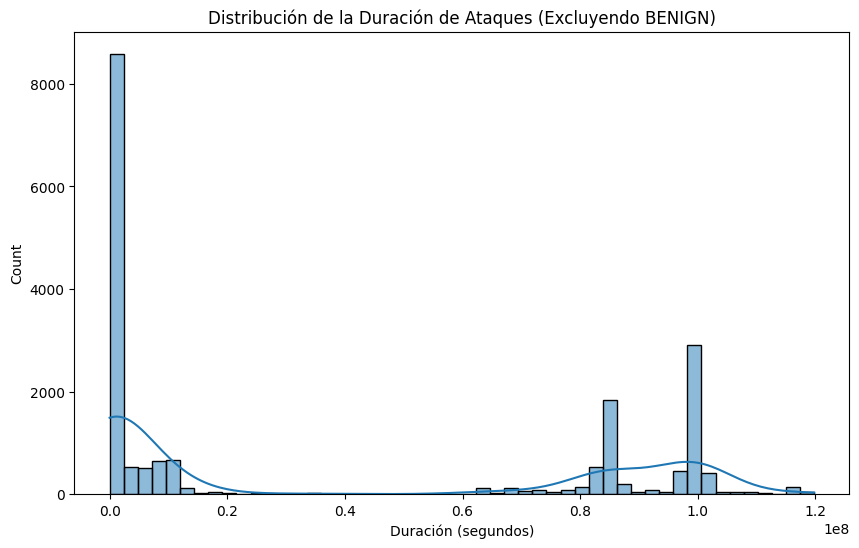

In [77]:
# Ejemplo 1: Histograma con bins ajustados
df_ataques = df_sample[df_sample[' Label'] != 'benign']
plt.figure(figsize=(10, 6))
sns.histplot(df_ataques[' Flow Duration'], bins=50, kde=True)
plt.title('Distribución de la Duración de Ataques (Excluyendo BENIGN)')
plt.xlabel('Duración (segundos)')
plt.show()

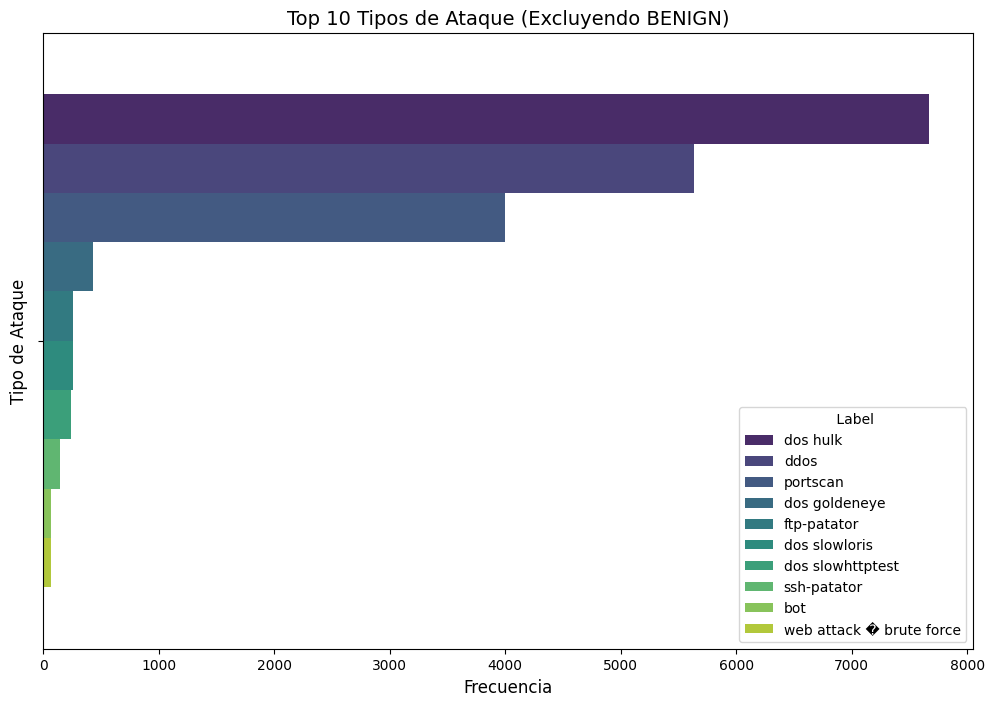

In [87]:

df_ataques = df_sample[df_sample[' Label'] != 'benign']

# Contar frecuencias de cada tipo de ataque
top_ataques = df_ataques[' Label'].value_counts().nlargest(10)

# Gráfico de barras horizontales (más legible)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_ataques.values, hue=top_ataques.index, palette='viridis')
plt.title('Top 10 Tipos de Ataque (Excluyendo BENIGN)', fontsize=14)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Tipo de Ataque', fontsize=12)
plt.show()

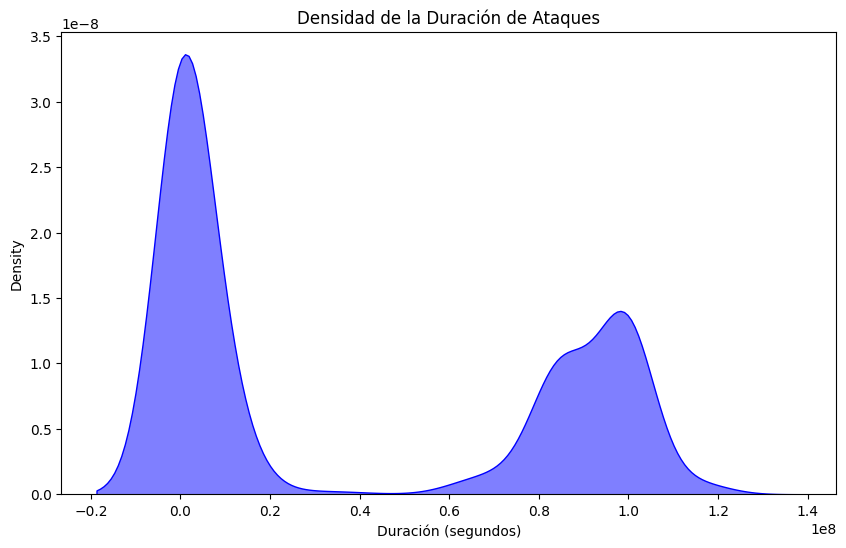

In [88]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    df_ataques[' Flow Duration'], 
    fill=True, 
    color='blue', 
    alpha=0.5
)
plt.title('Densidad de la Duración de Ataques')
plt.xlabel('Duración (segundos)')
plt.show()

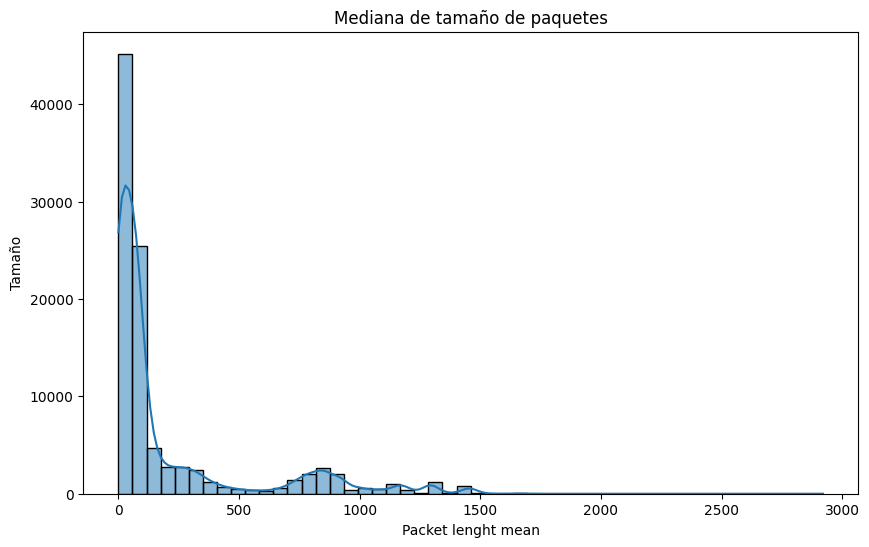

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(df_sample[' Packet Length Mean'], kde=True, bins=50)
plt.title('Mediana de tamaño de paquetes')
plt.xlabel('Packet lenght mean')
plt.ylabel('Tamaño')
plt.show()

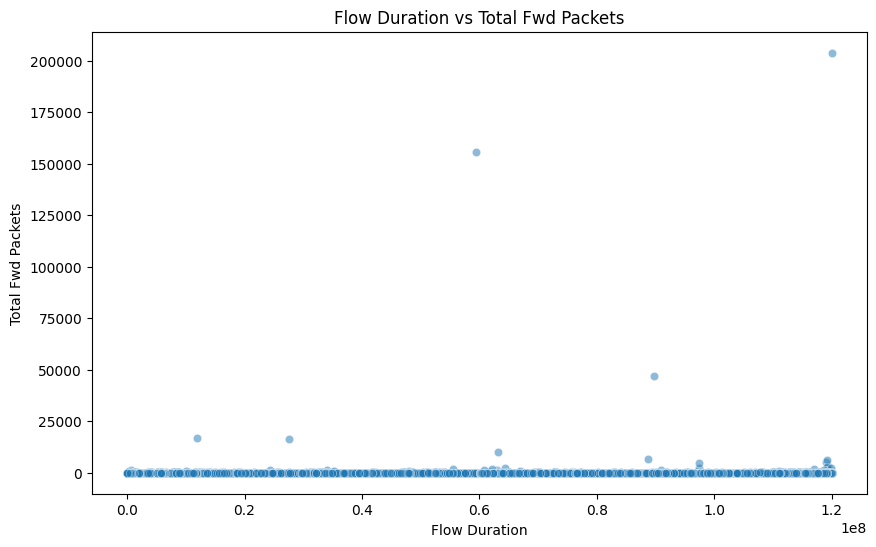

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Flow Duration', y=' Total Fwd Packets', data=df_sample, alpha=0.5)
plt.title('Flow Duration vs Total Fwd Packets')
plt.xlabel('Flow Duration')
plt.ylabel('Total Fwd Packets')
plt.show()


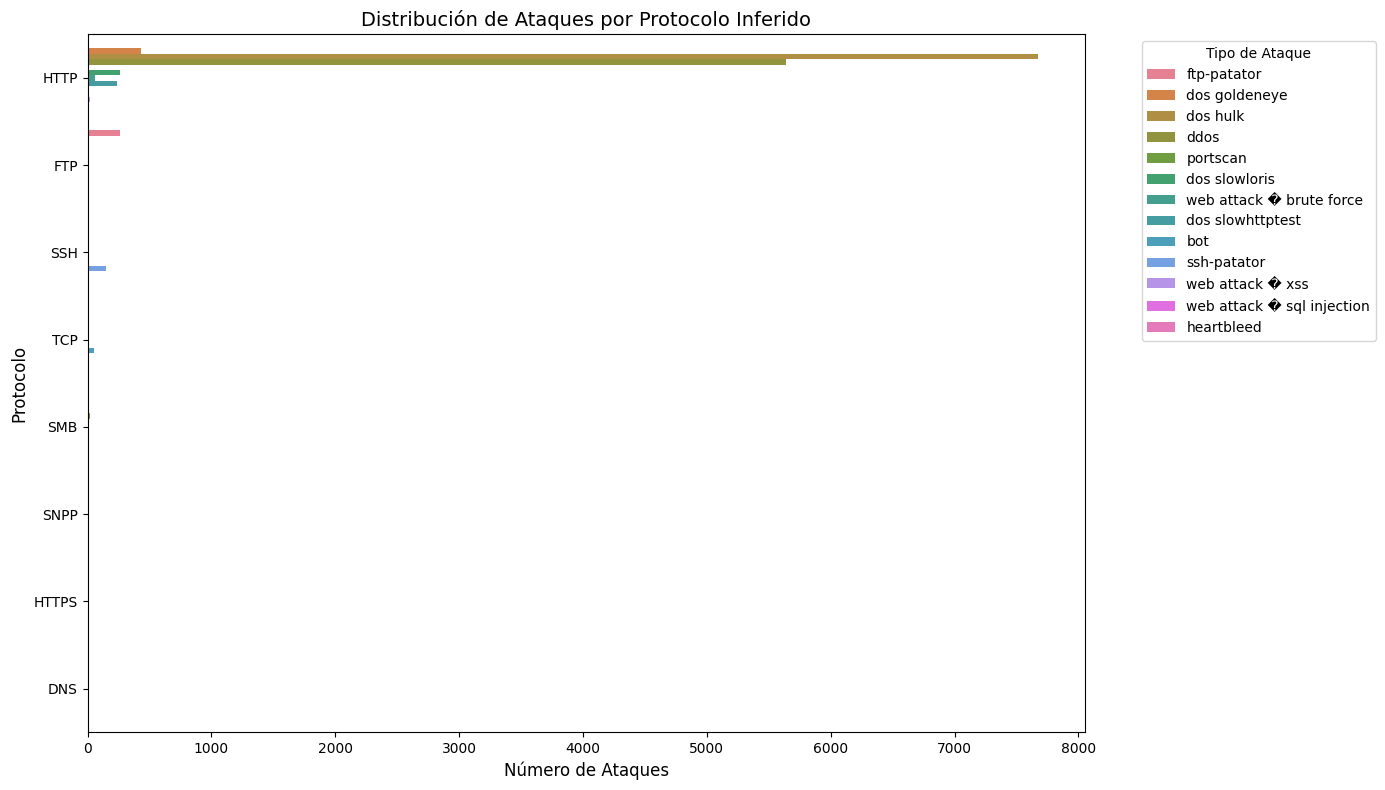

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de ataques por protocolo inferido
plt.figure(figsize=(14, 8))
sns.countplot(
    data=df_ataques,
    y="Inferred Protocol", 
    hue=" Label",
    order=df_ataques["Inferred Protocol"].value_counts().index  # Ordenar por frecuencia
)
plt.title("Distribución de Ataques por Protocolo Inferido", fontsize=14)
plt.xlabel("Número de Ataques", fontsize=12)
plt.ylabel("Protocolo", fontsize=12)
plt.legend(title="Tipo de Ataque", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [98]:
# Obtener frecuencias de puertos en ataques (excluyendo BENIGN)
top_ports = df_ataques[" Destination Port"].value_counts().reset_index()
top_ports.columns = ["Puerto Destino", "Número de Ataques"]

# Mapear protocolos a los puertos (usando el diccionario protocol_map)
top_ports["Protocolo Asociado"] = top_ports["Puerto Destino"].map(protocol_map)

# Mostrar tabla con los puertos más comunes
print("Puertos más frecuentes en ciberataques:")
print(top_ports.head(20))  # Muestra los top 20 (ajusta según necesites)

Puertos más frecuentes en ciberataques:
    Puerto Destino  Número de Ataques Protocolo Asociado
0             80.0              14337               HTTP
1             21.0                270                FTP
2             22.0                154                SSH
3           8080.0                 56                TCP
4            555.0                 11                NaN
5           3268.0                 10                NaN
6           1094.0                 10                NaN
7           8180.0                 10                NaN
8             79.0                 10                NaN
9          44501.0                  9                NaN
10          7800.0                  9                NaN
11         50389.0                  9                NaN
12          5033.0                  9                NaN
13          1056.0                  9                NaN
14             1.0                  9                NaN
15          2099.0                  9           

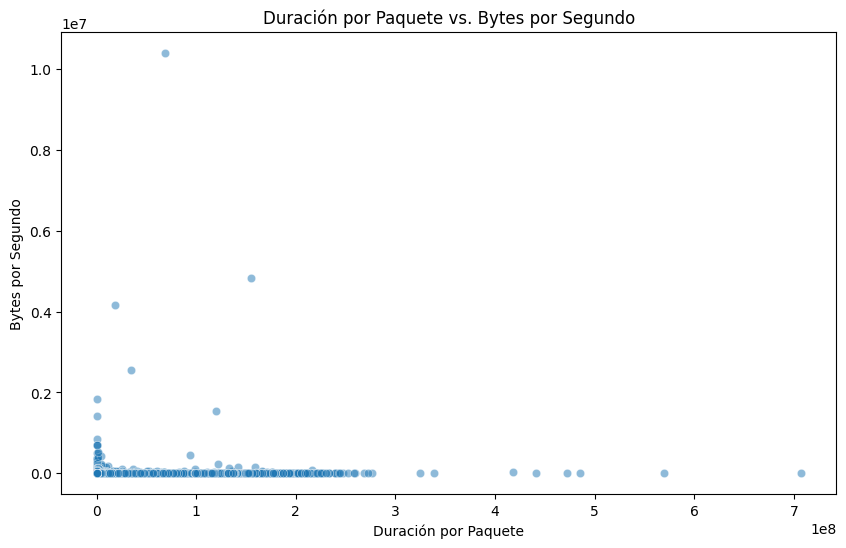

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_per_Packet', y='Bytes_per_Second', data=df_sample, alpha=0.5)
plt.title('Duración por Paquete vs. Bytes por Segundo')
plt.xlabel('Duración por Paquete')
plt.ylabel('Bytes por Segundo')
plt.show()


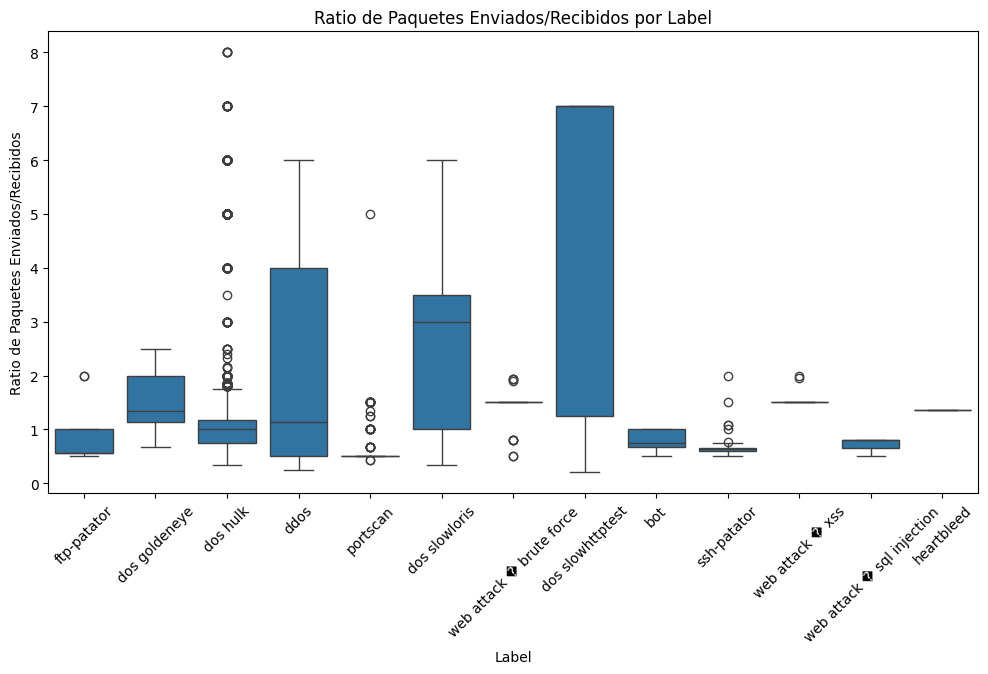

In [100]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=' Label', y='Fwd_Bwd_Packet_Ratio', data=df_ataques)
plt.title('Ratio de Paquetes Enviados/Recibidos por Label')
plt.xlabel('Label')
plt.ylabel('Ratio de Paquetes Enviados/Recibidos')
plt.xticks(rotation=45)
plt.show()
